In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#cargamos los datos
df = pd.read_csv('data/index_html.csv')
caramelo = pd.DataFrame(pd.read_csv('data/caramelo_html.csv'))
chicle = pd.DataFrame(pd.read_csv('data/chicle_html.csv'))
lollipop = pd.DataFrame(pd.read_csv('data/lollipop_html.csv'))
marshmallow = pd.DataFrame(pd.read_csv('data/marshmallow_html.csv'))
sugus = pd.DataFrame(pd.read_csv('data/sugus_html.csv'))

(Text(0.5, 1.0, 'sugus'),
 (0, 60),
 Text(0.5, 0, 'seconds'),
 Text(0, 0.5, 'visits'))

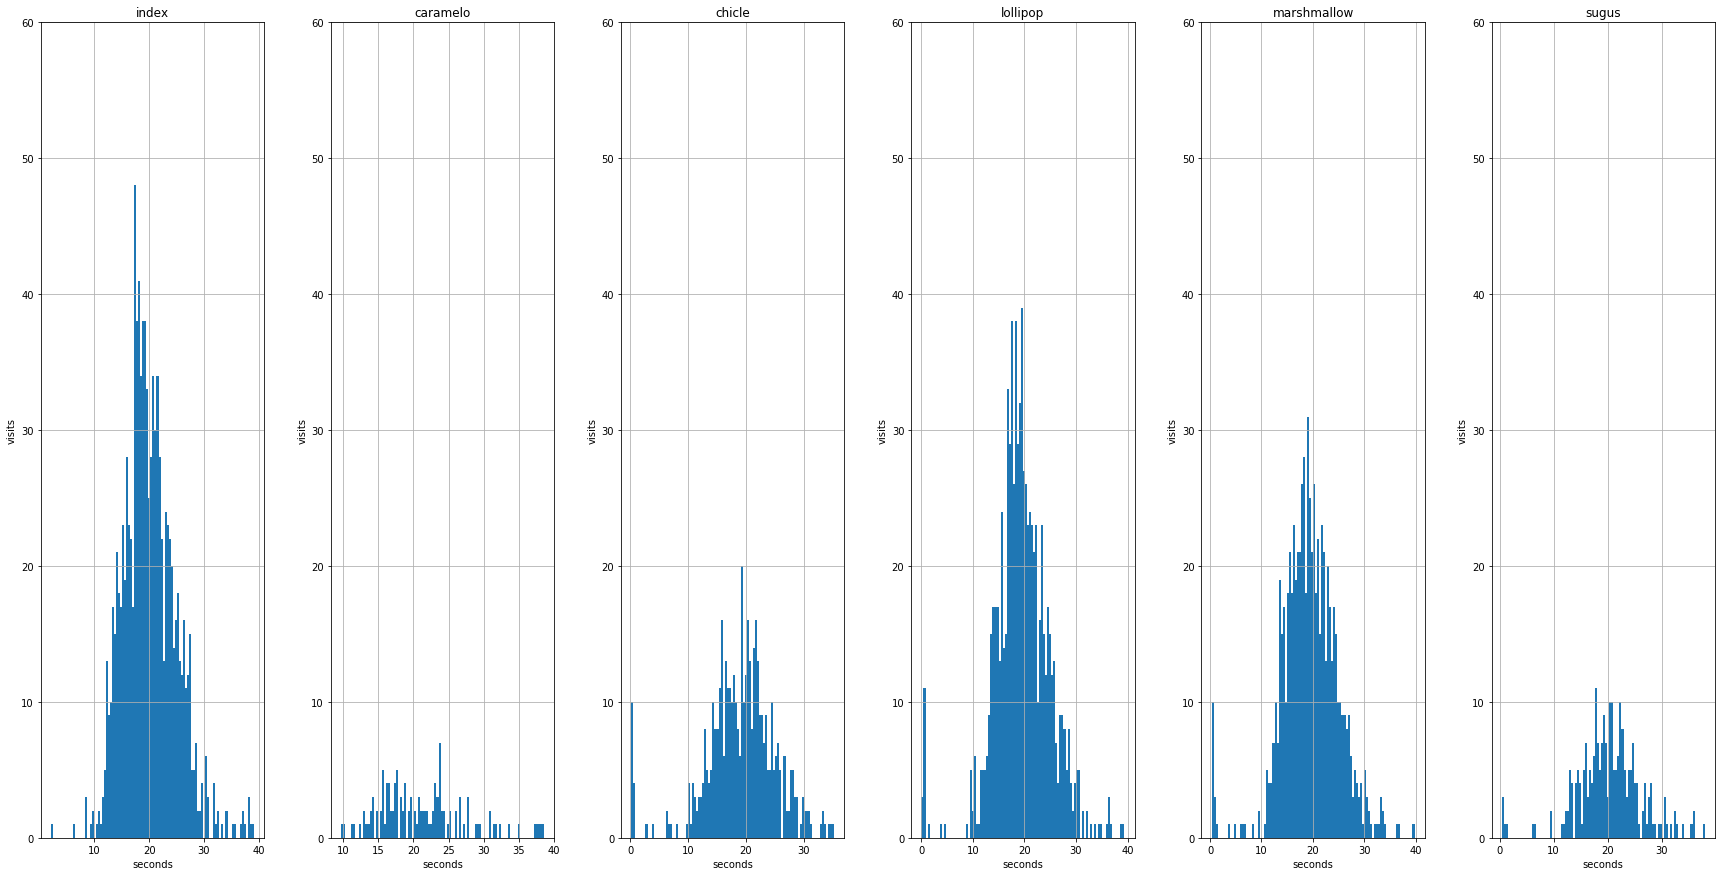

In [3]:
#comparando las gráficas podemos ver de manera más visual dónde se encuentran los bots introducidos por MegaSucrón
fig, axes = plt.subplots(1, 6, figsize=(30,15))

df.hist('seconds',bins=100,ax=axes[0])
caramelo.hist('seconds',bins=100, ax=axes[1])
chicle.hist('seconds',bins=100, ax=axes[2])
lollipop.hist('seconds',bins=100, ax=axes[3])
marshmallow.hist('seconds',bins=100, ax=axes[4])
sugus.hist('seconds',bins=100, ax=axes[5])

axes[0].set_title('index'),axes[0].set_xlabel('seconds'), axes[0].set_ylabel('visits'), axes[0].set_ylim([0,60])
axes[1].set_title('caramelo'), axes[1].set_ylim([0,60]),axes[1].set_xlabel('seconds'), axes[1].set_ylabel('visits')
axes[2].set_title('chicle'), axes[2].set_ylim([0,60]),axes[2].set_xlabel('seconds'), axes[2].set_ylabel('visits')
axes[3].set_title('lollipop'), axes[3].set_ylim([0,60]),axes[3].set_xlabel('seconds'), axes[3].set_ylabel('visits')
axes[4].set_title('marshmallow'), axes[4].set_ylim([0,60]),axes[4].set_xlabel('seconds'), axes[4].set_ylabel('visits')
axes[5].set_title('sugus'),axes[5].set_ylim([0,60]),axes[5].set_xlabel('seconds'), axes[5].set_ylabel('visits')


Conclusiones:
1. representar todo en una misma gráfica vs. en gráficas separadas?
Representando los datos de forma independiente entre las diferentes páginas nos ayudar a ver más claramente dónde se encuentran las modas que nos indican que estamos siendo atacados por Megasucrón

2. podemos identificar, a ojímetro, qué páginas están siendo scrapeadas y qué páginas no? Qué criterio usamos?
Las páginas de chicle, lollipop y marshmallow son las que más interesan a Megasucrón ya que contienen un número elevado de visitas de muy corta duración. Con sugus parece que lo intentó pero no pudo ser. Por otro lado podemos considerarlo normal, ya que el sugus no interesa a nadie.
3. podemos estimar, a mano, qué número aproximado de nuestras visitas diarias se debe a bots y qué número a personas?
Podríamos hacer una estimación (entre un 90-95% de público humano), pero se deberían utilizar métodos no manuales para ser más precisos.

In [4]:
#podemos escribir un programa que, dado un array de tiempos de permanencia, devuelva True si está siendo scrapeada y False en otro caso?
def scrappeo(seconds, name):
    max_seconds = 4
    scrapper_counter = 0
    for second in seconds:
        if second <= max_seconds:
            scrapper_counter = scrapper_counter + 1
    if scrapper_counter > 5:
        print('Your page ' + name + ' is being attacked by Megasucrón')
    else:
        print('Your page ' + name + ' is safe...for now')
    return 
scrappeo(df['seconds'], 'index')
scrappeo(caramelo['seconds'], 'caramelo')
scrappeo(chicle['seconds'], 'chicle')
scrappeo(lollipop['seconds'], 'lollipop')
scrappeo(marshmallow['seconds'], 'marshmallow')
scrappeo(sugus['seconds'], 'sugus')


Your page index is safe...for now
Your page caramelo is safe...for now
Your page chicle is being attacked by Megasucrón
Your page lollipop is being attacked by Megasucrón
Your page marshmallow is being attacked by Megasucrón
Your page sugus is safe...for now
